[View in Colaboratory](https://colab.research.google.com/github/cristianccq/EDPnumeric/blob/master/animacion_ecuacion_onda.ipynb)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
L = 1.0
T = 1.0  #tiempo max
m = 10
N = 20
alfa = 2

In [0]:
h = L/m
k = T/N
print(h,k)

0.1 0.05


In [0]:
x = np.zeros(m + 1)

In [0]:
x = np.array([round(i*h, 6) for i in range(m+1)])

In [0]:
w0 = np.sin(np.pi*x)

In [0]:
r = (4*k**2)/h**2
w1 = np.zeros(11)

In [0]:
for j in range(1,m):
        w1[j] = (1-r)*w0[j] + (r/2)*w0[j+1] + (r/2)*w0[j-1] + k*0
        
    

In [0]:
w1

array([0.        , 0.29389263, 0.55901699, 0.76942088, 0.9045085 ,
       0.95105652, 0.9045085 , 0.76942088, 0.55901699, 0.29389263,
       0.        ])

In [0]:
sol = np.zeros(( 21, 11))
sol[0] = w0
sol[1] = w1

In [0]:
def tridiag(a,b,c,N):
    A = np.zeros((N,N))
    
    np.fill_diagonal(A[:-1,1:],a)
    np.fill_diagonal(A,b)
    np.fill_diagonal(A[1:,:-1],c)
    
    return A

A = tridiag(r, 2-2*r, r, 9)

for i in range(1,20):
  sol[i+1,1:-1] = np.dot(A, sol[i,1:-1]) - sol[i-1,1:-1]



In [0]:
sol


array([[ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,
         8.09016994e-01,  9.51056516e-01,  1.00000000e+00,
         9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
         3.09016994e-01,  1.22464680e-16],
       [ 0.00000000e+00,  2.93892626e-01,  5.59016994e-01,
         7.69420884e-01,  9.04508497e-01,  9.51056516e-01,
         9.04508497e-01,  7.69420884e-01,  5.59016994e-01,
         2.93892626e-01,  0.00000000e+00],
       [ 0.00000000e+00,  2.50000000e-01,  4.75528258e-01,
         6.54508497e-01,  7.69420884e-01,  8.09016994e-01,
         7.69420884e-01,  6.54508497e-01,  4.75528258e-01,
         2.50000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.81635632e-01,  3.45491503e-01,
         4.75528258e-01,  5.59016994e-01,  5.87785252e-01,
         5.59016994e-01,  4.75528258e-01,  3.45491503e-01,
         1.81635632e-01,  0.00000000e+00],
       [ 0.00000000e+00,  9.54915028e-02,  1.81635632e-01,
         2.50000000e-01,  2.93892626e-01,  3.09016994e-01,
  

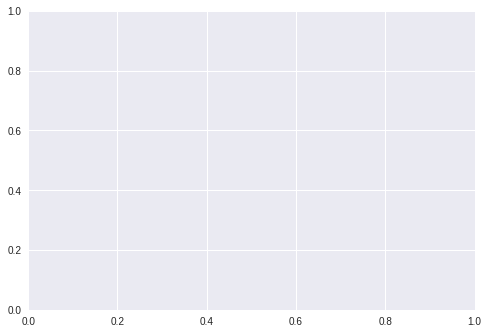

In [0]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 1, 11)
t = np.linspace(0, 1, 21)

In [0]:
def init():
  ax.plot([], [])
  ax.grid()
  ax.set_ylim(-2.0, 2.0)
  ax.set_ylabel("Altura")
  ax.set_xlabel("Posición en la cuerda")
  ax.set_title("Movimiento de la cuerda")

def animate(i):
  del ax.lines[:]
  ax.plot(x, sol[i], color="blue", label="aprox. $t = {0:.2f}$ seg.".format(t[i]))
  ax.legend()
  
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=21, interval=120, repeat=True)

anim